<a href="https://colab.research.google.com/github/Ssergeymiss/Bank_scorring/blob/NN_F/Bank_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_new=pd.read_csv("/content/drive/MyDrive/тестовое задание/new_training_data_31_08_2022.csv")
pd.set_option('display.max_columns', None)
df_new.head()

,Unnamed: 0,age,lastcredit,time_to_lastcredit_closeddt,close_loan_median,open_loan_median,is_active_100,isnt_active_100,is_lost_100,micro_loans_active_100,is_active_12,open_sum_12,isnt_active_12,is_lost_12,overdue_loans_12,micro_loans_active_12,is_active_3,open_sum_3,isnt_active_3,is_lost_3,overdue_loans_3,micro_loans_active_3,is_active_1,open_sum_1,isnt_active_1,is_lost_1,micro_loans_active_1,ratio_all_microloans_3_to_12,ratio_overdue_loans_3_to_12,ratio_history_100,ratio_history_12,fraction_last_x_12,ratio_history_3,fraction_last_x_3,ratio_history_1,fraction_last_x_1,mean_delay_100_with_lag,mean_delay_12_with_lag,mean_delay_3_with_lag,mean_delay_1_with_lag,ratio_mean_delay_3_to_12,count_all_credits,ratio_pattern_len_to_pattern_1,ratio_pattern_len_to_pattern_2,ratio_pattern_len_to_pattern_3,ratio_pattern_len_to_pattern_4,ratio_pattern_len_to_pattern_bad_len,last_microloan_openeddt,is_type_credit_card_100,is_type_consumer_100,is_type_micro_100,is_active_type_credit_card_100,is_active_type_consumer_100,is_active_type_micro_100,is_type_credit_card_12,is_type_consumer_12,is_type_micro_12,is_active_type_credit_card_12,is_active_type_consumer_12,is_active_type_micro_12,is_type_credit_card_3,is_type_consumer_3,is_type_micro_3,is_active_type_credit_card_3,is_active_type_consumer_3,is_active_type_micro_3,is_type_credit_card_1,is_type_consumer_1,is_type_micro_1,is_active_type_credit_card_1,is_active_type_consumer_1,is_active_type_micro_1,overall_worst_overdue_state_12,ratio_sum_outstanding_to_open_sum,target
0,0,43.0,81.0,235.0,0.0,4.0,34.0,70.0,0.0,421478.0,4.0,36458.0,3.0,0.0,0.0,18000.0,1.0,8458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.067308,0.0,0.009615,NaN,0.000000,31.566929,8.015748,0.228346,0.228346,0.028487,127.0,0.0,0.0,0.0,0.0,0.875,289.0,1.0,2.0,115.0,1.0,1.0,32.0,1.0,1.0,5.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.942917,0.0
1,1,35.0,3.0,0.0,0.0,1.0,41.0,36.0,0.0,627578.0,39.0,1902599.0,34.0,0.0,0.0,627578.0,33.0,583578.0,22.0,0.0,0.0,583578.0,14.0,348778.0,5.0,0.0,348778.0,0.794872,NaN,0.0,0.0,0.948052,0.0,0.714286,0.0,0.246753,0.322222,0.322222,0.000000,0.000000,0.000000,90.0,0.0,0.0,0.0,0.0,0.000,3.0,4.0,7.0,78.0,4.0,1.0,36.0,2.0,1.0,78.0,2.0,1.0,36.0,0.0,0.0,62.0,0.0,0.0,33.0,0.0,0.0,20.0,0.0,0.0,14.0,7.0,NaN,0.0
2,2,27.0,19.0,65.0,0.0,7.0,25.0,34.0,0.0,214655.0,9.0,96195.0,6.0,0.0,0.0,96195.0,2.0,29156.0,0.0,0.0,0.0,29156.0,1.0,25436.0,0.0,0.0,25436.0,0.133333,NaN,0.0,0.0,0.254237,0.0,0.033898,0.0,0.016949,36.107692,18.953846,0.000000,0.000000,0.000000,65.0,0.0,0.0,0.0,0.0,0.000,19.0,3.0,2.0,60.0,3.0,1.0,21.0,0.0,0.0,15.0,0.0,0.0,9.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,120.0,0.098896,1.0
3,3,32.0,14.0,76.0,0.0,11.5,13.0,35.0,0.0,88856.0,11.0,88856.0,10.0,0.0,0.0,88856.0,9.0,66856.0,0.0,0.0,0.0,66856.0,5.0,28666.0,0.0,0.0,28666.0,0.360000,NaN,0.0,0.0,0.437500,0.0,0.187500,0.0,0.104167,2.033333,1.550000,1.083333,0.000000,0.698925,60.0,0.0,0.0,0.0,0.0,0.000,14.0,2.0,0.0,58.0,2.0,0.0,11.0,0.0,0.0,25.0,0.0,0.0,11.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,5.0,0.0,0.0,5.0,59.0,0.298009,1.0
4,5,23.0,5.0,0.0,0.0,1.0,26.0,52.0,0.0,345820.0,26.0,371008.0,36.0,0.0,0.0,345820.0,19.0,251720.0,5.0,0.0,0.0,251720.0,12.0,131720.0,2.0,0.0,131720.0,0.366197,NaN,0.0,0.0,0.794872,0.0,0.307692,0.0,0.179487,2.647727,0.647727,0.318182,0.000000,0.491228,88.0,0.0,0.0,0.0,0.0,0.000,5.0,0.0,2.0,86.0,0.0,1.0,25.0,0.0,1.0,71.0,0.0,1.0,25.0,0.0,0.0,26.0,0.0,0.0,19.0,0.0,0.0,16.0,0.0,0.0,12.0,29.0,0.031670,0.0


In [127]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42529 entries, 0 to 42528
Data columns (total 75 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            42529 non-null  int64  
 1   age                                   42529 non-null  float64
 2   lastcredit                            42529 non-null  float64
 3   time_to_lastcredit_closeddt           42529 non-null  float64
 4   close_loan_median                     42520 non-null  float64
 5   open_loan_median                      42520 non-null  float64
 6   is_active_100                         42529 non-null  float64
 7   isnt_active_100                       42529 non-null  float64
 8   is_lost_100                           42529 non-null  float64
 9   micro_loans_active_100                42529 non-null  float64
 10  is_active_12                          42529 non-null  float64
 11  open_sum_12    

In [ ]:
df_new.describe()

,Unnamed: 0,age,lastcredit,time_to_lastcredit_closeddt,close_loan_median,open_loan_median,is_active_100,isnt_active_100,is_lost_100,micro_loans_active_100,is_active_12,open_sum_12,isnt_active_12,is_lost_12,overdue_loans_12,micro_loans_active_12,is_active_3,open_sum_3,isnt_active_3,is_lost_3,overdue_loans_3,micro_loans_active_3,is_active_1,open_sum_1,isnt_active_1,is_lost_1,micro_loans_active_1,ratio_all_microloans_3_to_12,ratio_overdue_loans_3_to_12,ratio_history_100,ratio_history_12,fraction_last_x_12,ratio_history_3,fraction_last_x_3,ratio_history_1,fraction_last_x_1,mean_delay_100_with_lag,mean_delay_12_with_lag,mean_delay_3_with_lag,mean_delay_1_with_lag,ratio_mean_delay_3_to_12,count_all_credits,ratio_pattern_len_to_pattern_1,ratio_pattern_len_to_pattern_2,ratio_pattern_len_to_pattern_3,ratio_pattern_len_to_pattern_4,ratio_pattern_len_to_pattern_bad_len,last_microloan_openeddt,is_type_credit_card_100,is_type_consumer_100,is_type_micro_100,is_active_type_credit_card_100,is_active_type_consumer_100,is_active_type_micro_100,is_type_credit_card_12,is_type_consumer_12,is_type_micro_12,is_active_type_credit_card_12,is_active_type_consumer_12,is_active_type_micro_12,is_type_credit_card_3,is_type_consumer_3,is_type_micro_3,is_active_type_credit_card_3,is_active_type_consumer_3,is_active_type_micro_3,is_type_credit_card_1,is_type_consumer_1,is_type_micro_1,is_active_type_credit_card_1,is_active_type_consumer_1,is_active_type_micro_1,overall_worst_overdue_state_12,ratio_sum_outstanding_to_open_sum,target
count,42529.000000,42529.000000,42529.000000,42529.000000,42520.000000,42520.000000,42529.000000,42529.000000,42529.000000,4.252900e+04,42529.000000,4.252900e+04,42529.000000,42529.000000,42529.0,4.252900e+04,42529.000000,4.252900e+04,42529.000000,42529.000000,42529.0,4.252900e+04,42529.000000,4.252900e+04,42529.000000,42529.000000,4.252900e+04,42497.000000,35685.0,42529.000000,42506.000000,42529.000000,42311.000000,42529.000000,42136.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,39968.000000,42529.000000,42520.000000,42520.000000,42520.000000,42520.000000,42520.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,42529.000000,3.972900e+04,42529.000000
mean,16848.107644,34.810083,10.635731,127.219074,0.341816,208.410136,20.514026,59.126384,0.601096,2.732486e+05,17.978697,4.341582e+05,41.251428,0.333772,0.0,2.630186e+05,15.395025,2.517135e+05,17.808178,0.196572,0.0,2.244234e+05,10.907687,1.524075e+05,3.656093,0.050083,1.444739e+05,0.664484,0.0,0.010133,0.006037,0.765207,0.005459,0.502247,0.003209,0.251325,6.131376,1.259617,0.360089,0.121117,0.235310,96.074914,0.261557,0.000800,0.000562,0.000424,0.020464,80.727856,3.126243,5.435562,85.083331,2.048508,1.192598,17.227351,0.792941,1.168614,66.454302,0.717581,0.557667,16.690211,0.138611,0.412401,38.021162,0.132827,0.186743,15.072774,0.032307,0.170284,16.744668,0.031414,0.099462,10.775824,105.647511,NaN,0.277458
std,10120.477450,8.824184,75.480643,2343.824022,13.084530,2694.463251,14.096084,93.770528,1.677791,2.572130e+05,12.962893,7.546497e+05,53.450976,1.126719,0.0,2.502506e+05,11.371042,3.418103e+05,21.240575,0.733526,0.0,2.042761e+05,8.590182,2.152385e+05,5.694563,0.336283,1.371331e+05,0.270511,0.0,0.030389,0.026586,0.237140,0.022691,0.257296,0.022702,0.183546,10.100164,3.376396,1.240212,0.464253,0.371458,120.402188,0.434042,0.014339,0.010849,0.009543,0.108893,1762.085559,3.359941,7.669688,116.720976,2.211903,1.703506,12.268475,1.327016,2.459338,70.279783,1.199907,1.074479,12.303613,0.523028,1.181154,35.370090,0.501096,0.544115,11.205629,0.259851,0.600797,15.945144,0.248208,0.380749,8.509719,36.631149,NaN,0.447750
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [ ]:
df_train=df_new.fillna(0)
df_train=df_train.drop("target",axis=1)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression

 
SEED = 1

def plot_features_scores(model, data, target, column_names, model_type):
    '''Функция для визуализации важности признаков'''
    
    model.fit(data, target)
    
    if model_type == 'rf':
        (pd.DataFrame(data={'score': model['rf'].feature_importances_}, 
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(10,18), legend=False));
    elif model_type == 'lr':
        (pd.DataFrame(data={'score': model['lr'].coef_[0]},
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(10,18), legend=False));
        
    else:
        raise KeyError('Unknown model_type')

def grid_search(model, gs_params):
    '''Функция для подбора гиперпараметров с помощью перекрёстной проверки'''
     
    gs = GridSearchCV(estimator=model, param_grid=gs_params, refit=True,
                      scoring='roc_auc', n_jobs=-1, cv=skf, verbose=0)
    gs.fit(X, y)
    scores = [gs.cv_results_[f'split{i}_test_score'][gs.best_index_] for i in range(5)]
    print('scores = {}, \nmean score = {:.5f} +/- {:.5f} \
           \nbest params = {}'.format(scores,
                                      gs.cv_results_['mean_test_score'][gs.best_index_],
                                      gs.cv_results_['std_test_score'][gs.best_index_],
                                      gs.best_params_))
    return gs
        


# датасет, с которым будем работать

X = df_train.copy()

# преобразуем целевую переменную
y = df_new['target'].values

X.head()

,Unnamed: 0,age,lastcredit,time_to_lastcredit_closeddt,close_loan_median,open_loan_median,is_active_100,isnt_active_100,is_lost_100,micro_loans_active_100,is_active_12,open_sum_12,isnt_active_12,is_lost_12,overdue_loans_12,micro_loans_active_12,is_active_3,open_sum_3,isnt_active_3,is_lost_3,overdue_loans_3,micro_loans_active_3,is_active_1,open_sum_1,isnt_active_1,is_lost_1,micro_loans_active_1,ratio_all_microloans_3_to_12,ratio_overdue_loans_3_to_12,ratio_history_100,ratio_history_12,fraction_last_x_12,ratio_history_3,fraction_last_x_3,ratio_history_1,fraction_last_x_1,mean_delay_100_with_lag,mean_delay_12_with_lag,mean_delay_3_with_lag,mean_delay_1_with_lag,ratio_mean_delay_3_to_12,count_all_credits,ratio_pattern_len_to_pattern_1,ratio_pattern_len_to_pattern_2,ratio_pattern_len_to_pattern_3,ratio_pattern_len_to_pattern_4,ratio_pattern_len_to_pattern_bad_len,last_microloan_openeddt,is_type_credit_card_100,is_type_consumer_100,is_type_micro_100,is_active_type_credit_card_100,is_active_type_consumer_100,is_active_type_micro_100,is_type_credit_card_12,is_type_consumer_12,is_type_micro_12,is_active_type_credit_card_12,is_active_type_consumer_12,is_active_type_micro_12,is_type_credit_card_3,is_type_consumer_3,is_type_micro_3,is_active_type_credit_card_3,is_active_type_consumer_3,is_active_type_micro_3,is_type_credit_card_1,is_type_consumer_1,is_type_micro_1,is_active_type_credit_card_1,is_active_type_consumer_1,is_active_type_micro_1,overall_worst_overdue_state_12,ratio_sum_outstanding_to_open_sum
0,0,43.0,81.0,235.0,0.0,4.0,34.0,70.0,0.0,421478.0,4.0,36458.0,3.0,0.0,0.0,18000.0,1.0,8458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.067308,0.0,0.009615,0.0,0.000000,31.566929,8.015748,0.228346,0.228346,0.028487,127.0,0.0,0.0,0.0,0.0,0.875,289.0,1.0,2.0,115.0,1.0,1.0,32.0,1.0,1.0,5.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.942917
1,1,35.0,3.0,0.0,0.0,1.0,41.0,36.0,0.0,627578.0,39.0,1902599.0,34.0,0.0,0.0,627578.0,33.0,583578.0,22.0,0.0,0.0,583578.0,14.0,348778.0,5.0,0.0,348778.0,0.794872,0.0,0.0,0.0,0.948052,0.0,0.714286,0.0,0.246753,0.322222,0.322222,0.000000,0.000000,0.000000,90.0,0.0,0.0,0.0,0.0,0.000,3.0,4.0,7.0,78.0,4.0,1.0,36.0,2.0,1.0,78.0,2.0,1.0,36.0,0.0,0.0,62.0,0.0,0.0,33.0,0.0,0.0,20.0,0.0,0.0,14.0,7.0,0.000000
2,2,27.0,19.0,65.0,0.0,7.0,25.0,34.0,0.0,214655.0,9.0,96195.0,6.0,0.0,0.0,96195.0,2.0,29156.0,0.0,0.0,0.0,29156.0,1.0,25436.0,0.0,0.0,25436.0,0.133333,0.0,0.0,0.0,0.254237,0.0,0.033898,0.0,0.016949,36.107692,18.953846,0.000000,0.000000,0.000000,65.0,0.0,0.0,0.0,0.0,0.000,19.0,3.0,2.0,60.0,3.0,1.0,21.0,0.0,0.0,15.0,0.0,0.0,9.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,120.0,0.098896
3,3,32.0,14.0,76.0,0.0,11.5,13.0,35.0,0.0,88856.0,11.0,88856.0,10.0,0.0,0.0,88856.0,9.0,66856.0,0.0,0.0,0.0,66856.0,5.0,28666.0,0.0,0.0,28666.0,0.360000,0.0,0.0,0.0,0.437500,0.0,0.187500,0.0,0.104167,2.033333,1.550000,1.083333,0.000000,0.698925,60.0,0.0,0.0,0.0,0.0,0.000,14.0,2.0,0.0,58.0,2.0,0.0,11.0,0.0,0.0,25.0,0.0,0.0,11.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,5.0,0.0,0.0,5.0,59.0,0.298009
4,5,23.0,5.0,0.0,0.0,1.0,26.0,52.0,0.0,345820.0,26.0,371008.0,36.0,0.0,0.0,345820.0,19.0,251720.0,5.0,0.0,0.0,251720.0,12.0,131720.0,2.0,0.0,131720.0,0.366197,0.0,0.0,0.0,0.794872,0.0,0.307692,0.0,0.179487,2.647727,0.647727,0.318182,0.000000,0.491228,88.0,0.0,0.0,0.0,0.0,0.000,5.0,0.0,2.0,86.0,0.0,1.0,25.0,0.0,1.0,71.0,0.0,1.0,25.0,0.0,0.0,26.0,0.0,0.0,19.0,0.0,0.0,16.0,0.0,0.0,12.0,29.0,0.031670


In [ ]:
y[y == 1.0 ] = 1
y[y == 0.0 ] = 0
y[:5]

array([0., 0., 1., 1., 0.])

In [ ]:
X = np.nan_to_num(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_data.py:483: RuntimeWarning: overflow encountered in subtract
  data_range = data_max - data_min
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


scores = [0.65612652 0.65504662 0.66348517 0.64701673 0.63898595] 
mean score = 0.65213 +/- 0.00839


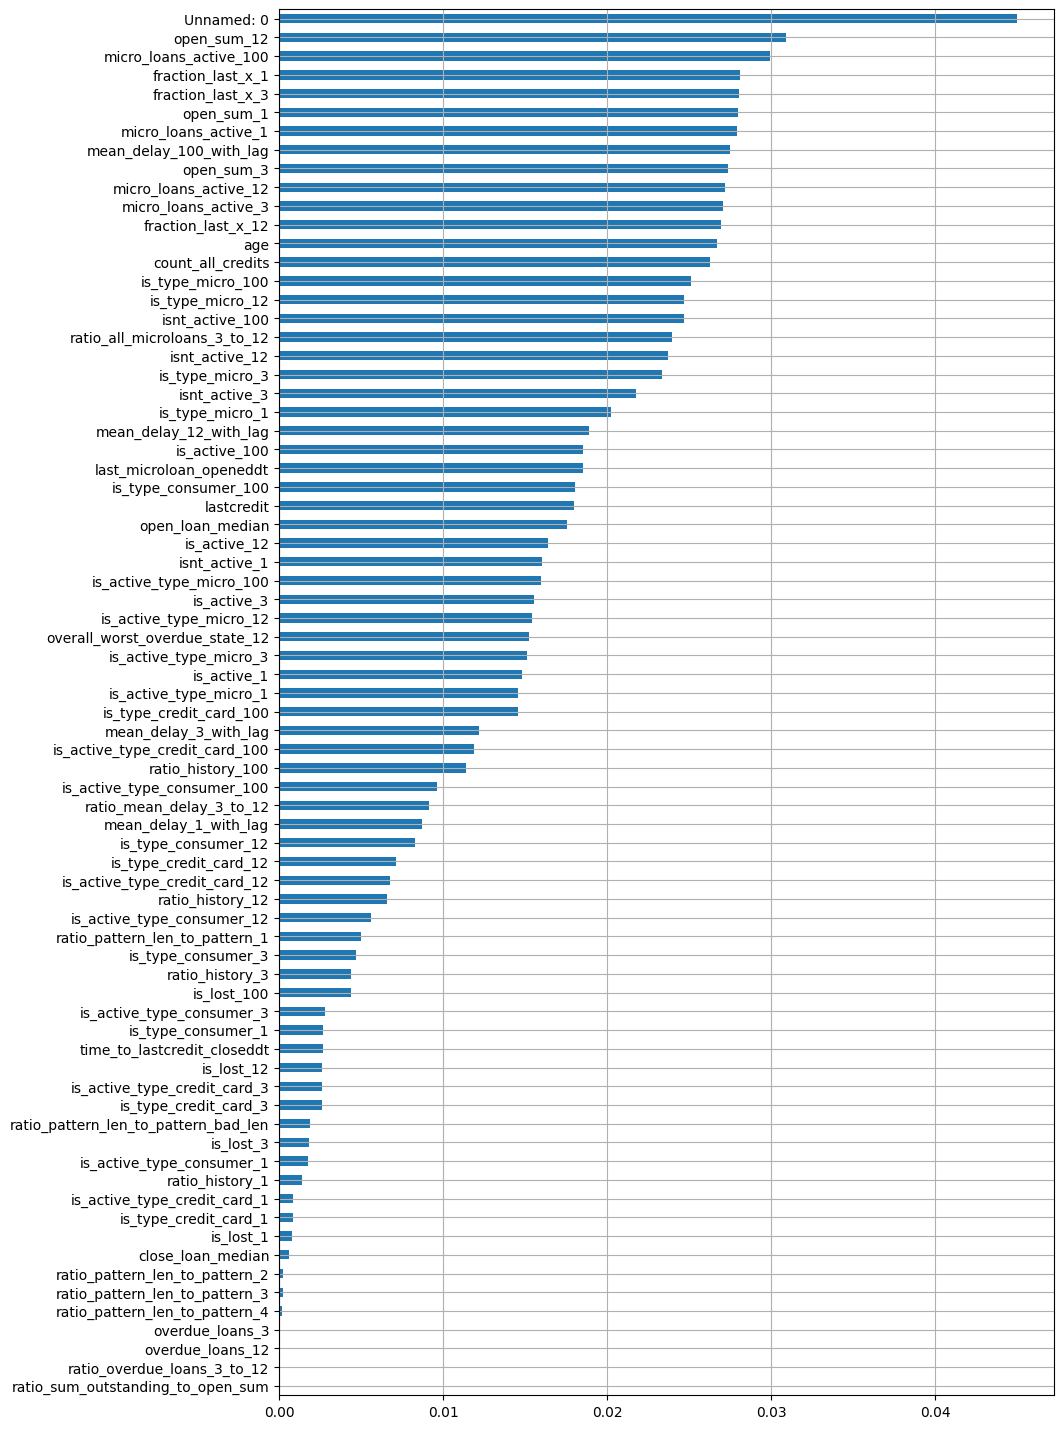

In [ ]:
rf = Pipeline([('rf', RandomForestClassifier(n_jobs=-1, 
                                             class_weight='balanced', 
                                             random_state=SEED))])

# параметры кросс-валидации (стратифицированная 5-фолдовая с перемешиванием) 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

scores = cross_val_score(estimator=rf, X=X, y=y, 
                         cv=skf, scoring='roc_auc', n_jobs=-1)
print('scores = {} \nmean score = {:.5f} +/- {:.5f}'.format(scores, scores.mean(), scores.std()))

# важность признаков
plot_features_scores(model=rf, data=X, target=y, column_names=df_train.columns, model_type='rf')

In [ ]:
list(df.columns.values)

['Unnamed: 0',
 'age',
 'lastcredit',
 'time_to_lastcredit_closeddt',
 'close_loan_median',
 'open_loan_median',
 'is_active_100',
 'isnt_active_100',
 'is_lost_100',
 'micro_loans_active_100',
 'is_active_12',
 'open_sum_12',
 'isnt_active_12',
 'is_lost_12',
 'overdue_loans_12',
 'micro_loans_active_12',
 'is_active_3',
 'open_sum_3',
 'isnt_active_3',
 'is_lost_3',
 'overdue_loans_3',
 'micro_loans_active_3',
 'is_active_1',
 'open_sum_1',
 'isnt_active_1',
 'is_lost_1',
 'micro_loans_active_1',
 'ratio_all_microloans_3_to_12',
 'ratio_overdue_loans_3_to_12',
 'ratio_history_100',
 'ratio_history_12',
 'fraction_last_x_12',
 'ratio_history_3',
 'fraction_last_x_3',
 'ratio_history_1',
 'fraction_last_x_1',
 'mean_delay_100_with_lag',
 'mean_delay_12_with_lag',
 'mean_delay_3_with_lag',
 'mean_delay_1_with_lag',
 'ratio_mean_delay_3_to_12',
 'count_all_credits',
 'ratio_pattern_len_to_pattern_1',
 'ratio_pattern_len_to_pattern_2',
 'ratio_pattern_len_to_pattern_3',
 'ratio_pattern_le

In [393]:
#X=df_new.drop("target",axis=1)#[["open_sum_12","micro_loans_active_100","fraction_last_x_3",
      #"fraction_last_x_1","open_sum_1","micro_loans_active_1","age",
       #"fraction_last_x_12","is_active_100","mean_delay_100_with_lag",
       #"open_sum_3","micro_loans_active_12","micro_loans_active_3","count_all_credits"]]
X=df_new.drop(['ratio_sum_outstanding_to_open_sum', 'ratio_overdue_loans_3_to_12','overdue_loans_3', 
         'ratio_pattern_len_to_pattern_2','ratio_pattern_len_to_pattern_3', 'ratio_pattern_len_to_pattern_4','target'], axis=1)

In [382]:
X.head()

,Unnamed: 0,age,lastcredit,time_to_lastcredit_closeddt,close_loan_median,open_loan_median,is_active_100,isnt_active_100,is_lost_100,micro_loans_active_100,is_active_12,open_sum_12,isnt_active_12,is_lost_12,overdue_loans_12,micro_loans_active_12,is_active_3,open_sum_3,isnt_active_3,is_lost_3,micro_loans_active_3,is_active_1,open_sum_1,isnt_active_1,is_lost_1,micro_loans_active_1,ratio_all_microloans_3_to_12,ratio_history_100,ratio_history_12,fraction_last_x_12,ratio_history_3,fraction_last_x_3,ratio_history_1,fraction_last_x_1,mean_delay_100_with_lag,mean_delay_12_with_lag,mean_delay_3_with_lag,mean_delay_1_with_lag,ratio_mean_delay_3_to_12,count_all_credits,ratio_pattern_len_to_pattern_1,ratio_pattern_len_to_pattern_bad_len,last_microloan_openeddt,is_type_credit_card_100,is_type_consumer_100,is_type_micro_100,is_active_type_credit_card_100,is_active_type_consumer_100,is_active_type_micro_100,is_type_credit_card_12,is_type_consumer_12,is_type_micro_12,is_active_type_credit_card_12,is_active_type_consumer_12,is_active_type_micro_12,is_type_credit_card_3,is_type_consumer_3,is_type_micro_3,is_active_type_credit_card_3,is_active_type_consumer_3,is_active_type_micro_3,is_type_credit_card_1,is_type_consumer_1,is_type_micro_1,is_active_type_credit_card_1,is_active_type_consumer_1,is_active_type_micro_1,overall_worst_overdue_state_12,target
0,0,43.0,81.0,235.0,0.0,4.0,34.0,70.0,0.0,421478.0,4.0,36458.0,3.0,0.0,0.0,18000.0,1.0,8458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.067308,0.0,0.009615,NaN,0.000000,31.566929,8.015748,0.228346,0.228346,0.028487,127.0,0.0,0.875,289.0,1.0,2.0,115.0,1.0,1.0,32.0,1.0,1.0,5.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0
1,1,35.0,3.0,0.0,0.0,1.0,41.0,36.0,0.0,627578.0,39.0,1902599.0,34.0,0.0,0.0,627578.0,33.0,583578.0,22.0,0.0,583578.0,14.0,348778.0,5.0,0.0,348778.0,0.794872,0.0,0.0,0.948052,0.0,0.714286,0.0,0.246753,0.322222,0.322222,0.000000,0.000000,0.000000,90.0,0.0,0.000,3.0,4.0,7.0,78.0,4.0,1.0,36.0,2.0,1.0,78.0,2.0,1.0,36.0,0.0,0.0,62.0,0.0,0.0,33.0,0.0,0.0,20.0,0.0,0.0,14.0,7.0,0.0
2,2,27.0,19.0,65.0,0.0,7.0,25.0,34.0,0.0,214655.0,9.0,96195.0,6.0,0.0,0.0,96195.0,2.0,29156.0,0.0,0.0,29156.0,1.0,25436.0,0.0,0.0,25436.0,0.133333,0.0,0.0,0.254237,0.0,0.033898,0.0,0.016949,36.107692,18.953846,0.000000,0.000000,0.000000,65.0,0.0,0.000,19.0,3.0,2.0,60.0,3.0,1.0,21.0,0.0,0.0,15.0,0.0,0.0,9.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,120.0,1.0
3,3,32.0,14.0,76.0,0.0,11.5,13.0,35.0,0.0,88856.0,11.0,88856.0,10.0,0.0,0.0,88856.0,9.0,66856.0,0.0,0.0,66856.0,5.0,28666.0,0.0,0.0,28666.0,0.360000,0.0,0.0,0.437500,0.0,0.187500,0.0,0.104167,2.033333,1.550000,1.083333,0.000000,0.698925,60.0,0.0,0.000,14.0,2.0,0.0,58.0,2.0,0.0,11.0,0.0,0.0,25.0,0.0,0.0,11.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,5.0,0.0,0.0,5.0,59.0,1.0
4,5,23.0,5.0,0.0,0.0,1.0,26.0,52.0,0.0,345820.0,26.0,371008.0,36.0,0.0,0.0,345820.0,19.0,251720.0,5.0,0.0,251720.0,12.0,131720.0,2.0,0.0,131720.0,0.366197,0.0,0.0,0.794872,0.0,0.307692,0.0,0.179487,2.647727,0.647727,0.318182,0.000000,0.491228,88.0,0.0,0.000,5.0,0.0,2.0,86.0,0.0,1.0,25.0,0.0,1.0,71.0,0.0,1.0,25.0,0.0,0.0,26.0,0.0,0.0,19.0,0.0,0.0,16.0,0.0,0.0,12.0,29.0,0.0


In [394]:
X = np.nan_to_num(X)

In [395]:
X=scaler.fit_transform(X)

In [385]:
X[0]

array([0.00000000e+00, 4.38596491e-01, 1.59108990e-02, 5.24729262e-03,
       0.00000000e+00, 8.93894699e-05, 2.22222222e-01, 1.03811360e-02,
       0.00000000e+00, 7.63970607e-02, 2.83687943e-02, 1.16722785e-03,
       2.12014134e-03, 0.00000000e+00, 0.00000000e+00, 4.35606473e-03,
       7.93650794e-03, 4.75299647e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.73076923e-02, 0.00000000e+00, 9.61538462e-03,
       0.00000000e+00, 0.00000000e+00, 2.63057743e-01, 6.70773894e-02,
       4.88579130e-03, 1.25695297e-02, 2.84872299e-02, 1.46921642e-02,
       0.00000000e+00, 8.75000000e-01, 6.43187351e-03, 1.11111111e-02,
       5.33333333e-03, 1.35885620e-02, 3.33333333e-02, 3.03030303e-02,
       2.31884058e-01, 4.76190476e-02, 1.58730159e-02, 2.92568754e-03,
       4.76190476e-02, 3.33333333e-02, 1.44927536e-02, 6.66666667e-02,
      

In [396]:
X.shape

(42529, 68)

In [387]:
y.shape

(42529,)

<Axes: xlabel='target', ylabel='count'>

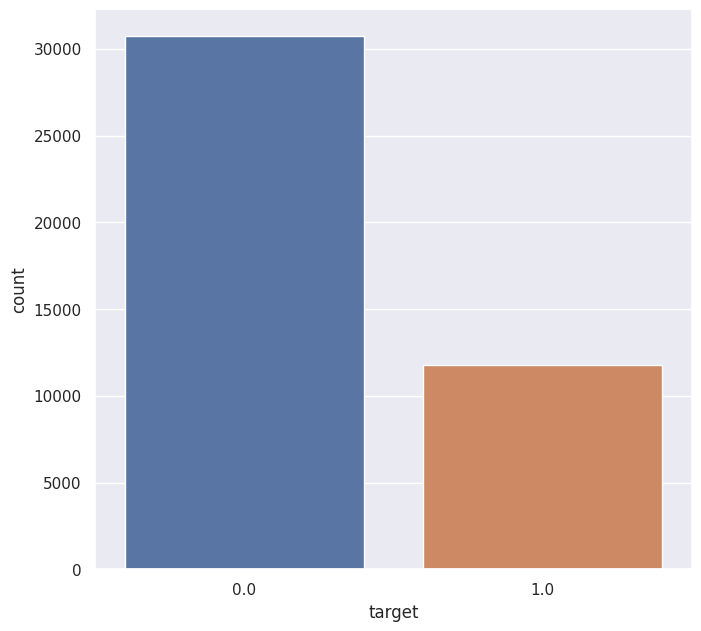

In [388]:
import seaborn as sns
sns.set(rc={'figure.figsize':(7.7,7.27)})
sns.countplot(data=df_new, x="target")

In [ ]:
from sklearn.model_selection import train_test_split

In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from collections import Counter

In [340]:
print("Изначальное количество таргетов в тренировочной выборке: ",Counter(y_train))

Изначальное количество таргетов в тренировочной выборке:  Counter({0.0: 21447, 1.0: 8323})


In [341]:
from imblearn.over_sampling import SMOTE

In [342]:
SMOTE = SMOTE()

In [398]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [365]:
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({1.0: 21447, 0.0: 21447})


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [ ]:
print("After undersampling: ", Counter(y_train_under))

After undersampling:  Counter({0.0: 8323, 1.0: 8323})


In [ ]:
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [399]:
models = []
models.append(RandomForestClassifier(n_estimators=265, max_depth=8, criterion='entropy'))
models.append(GradientBoostingClassifier(max_depth =8))
models.append(KNeighborsClassifier(n_neighbors=40))
models.append(GaussianNB())

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

После создания синтетических таргетов

In [400]:
for model in models:
    model.fit(X_train_SMOTE, y_train_SMOTE)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

Accuracy: 0.7122031507171408


KeyboardInterrupt: ignored

In [368]:
for model in models:
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    print(cf_matrix/np.sum(cf_matrix))

[[0.65459676 0.07288972]
 [0.21796379 0.05454973]]
[[0.68688769 0.04059879]
 [0.23536327 0.03715025]]
[[0.3550435  0.37244298]
 [0.09467827 0.17783525]]
[[0.32189043 0.40559605]
 [0.08958382 0.1829297 ]]


После случайного удаления

In [ ]:
from sklearn.metrics import roc_curve

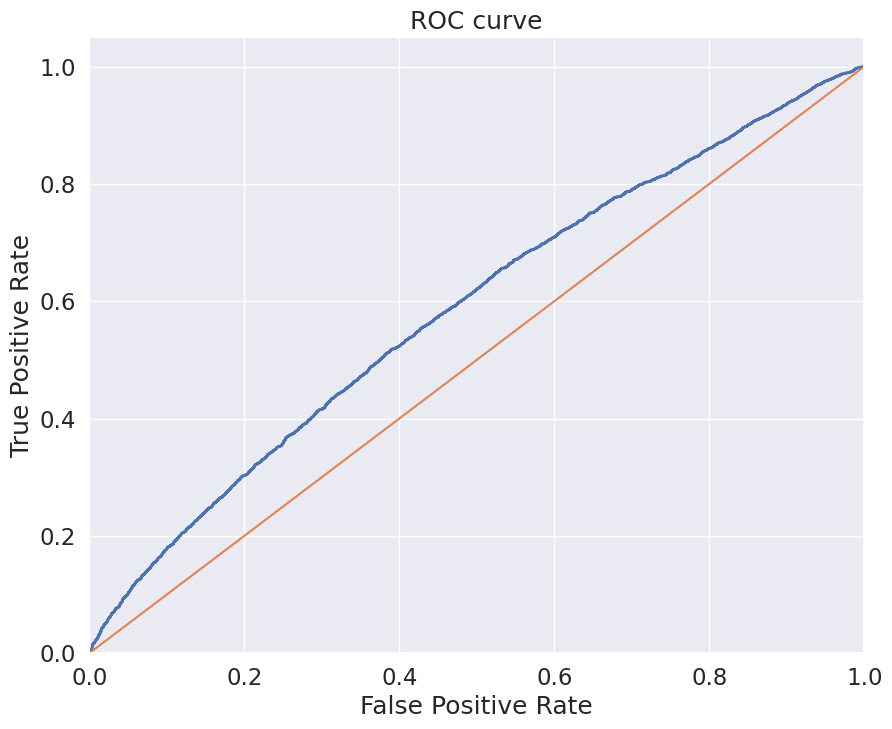

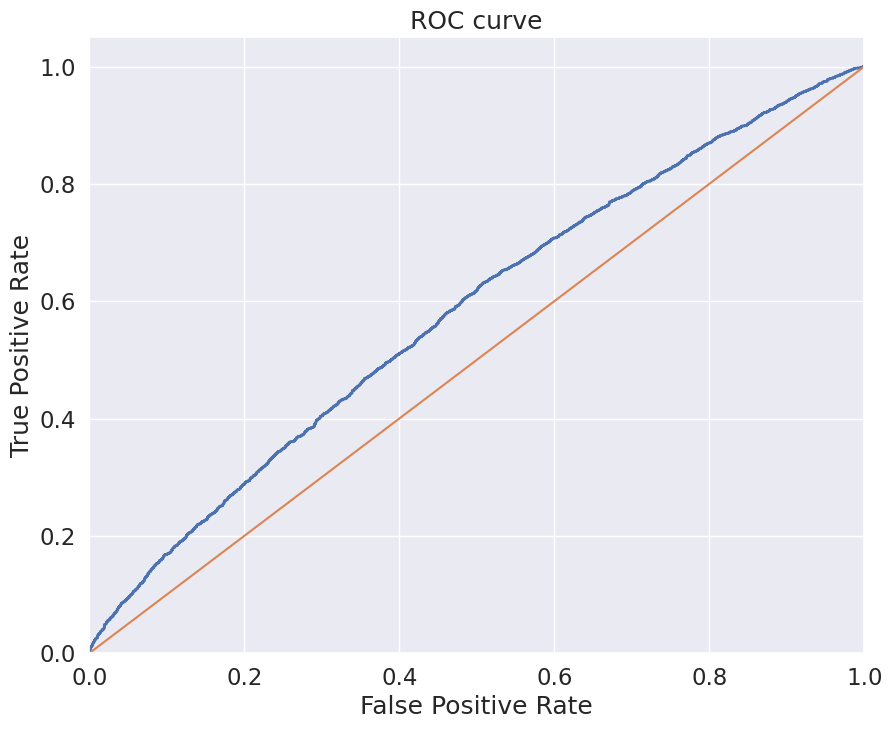

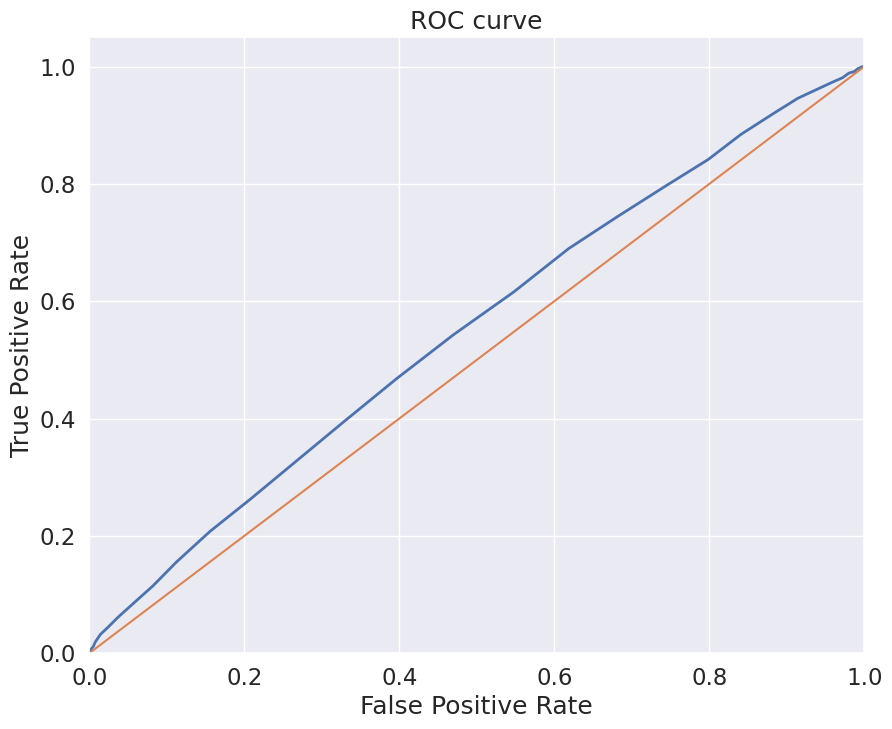

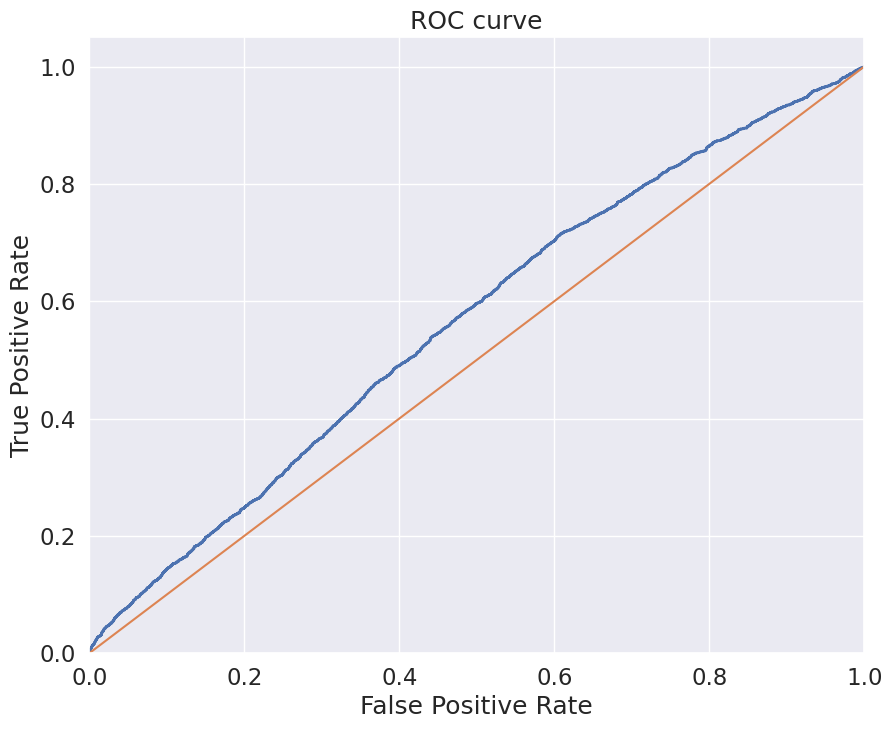

In [ ]:
for model in models:
  sns.set(font_scale=1.5)
  sns.set_color_codes("muted")
  model.fit(X_train_SMOTE, y_train_SMOTE)
  plt.figure(figsize=(10, 8))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
  lw = 2
  plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
  plt.plot([0, 1], [0, 1])
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve')
  plt.savefig("ROC.png")
  plt.show()

In [ ]:
from sklearn.metrics import roc_curve

In [282]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.activations import tanh, sigmoid

In [128]:
X_test[0].shape

(14,)

In [130]:
X_train[0].shape

(14,)

In [ ]:
import tensorflow as tf

In [402]:
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(512, activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))


In [162]:
!pip install keras_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
import keras_metrics

In [243]:
from sklearn.metrics import roc_auc_score

In [403]:
model.compile(optimizer = 'adam', loss = 'mse', metrics =tf.keras.metrics.AUC(
    num_thresholds=50,
    curve="ROC",
    summation_method="interpolation",
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False,
))

In [371]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)

In [372]:
model.load_weights('Bank_weights_1.1.h5')

ValueError: ignored

In [404]:
history=model.fit(X_train_SMOTE, y_train_SMOTE, epochs=150, batch_size=40, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/150
1073/1073 [==============================] - 14s 11ms/step - loss: 0.2499 - auc_11: 0.6181 - val_loss: 0.2752 - val_auc_11: 0.6312
Epoch 2/150
1073/1073 [==============================] - 13s 12ms/step - loss: 0.2286 - auc_11: 0.6668 - val_loss: 0.2289 - val_auc_11: 0.6283
Epoch 3/150
1073/1073 [==============================] - 12s 11ms/step - loss: 0.2253 - auc_11: 0.6788 - val_loss: 0.2386 - val_auc_11: 0.6395
Epoch 4/150
1073/1073 [==============================] - 13s 12ms/step - loss: 0.2223 - auc_11: 0.6903 - val_loss: 0.2311 - val_auc_11: 0.6373
Epoch 5/150
1073/1073 [==============================] - 13s 12ms/step - loss: 0.2190 - auc_11: 0.7012 - val_loss: 0.2279 - val_auc_11: 0.6312
Epoch 6/150
1073/1073 [==============================] - 12s 11ms/step - loss: 0.2169 - auc_11: 0.7081 - val_loss: 0.2220 - val_auc_11: 0.6368
Epoch 7/150
1073/1073 [==============================] - 11s 11ms/step - loss: 0.2143 - auc_11: 0.7160 - val_loss: 0.2340 - val_auc_11: 0.6268

KeyboardInterrupt: ignored

In [405]:
model.save_weights('Bank_weights_1.1.h5')

In [406]:
predict_prob=model.predict(X_test)
predict_classes= np.rint(predict_prob)

399/399 [==============================] - 1s 2ms/step


In [376]:
y_test[:10]

array([0., 1., 1., 0., 0., 1., 0., 0., 0., 1.])

In [407]:
predict_classes[:10]

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [408]:
cf_matrix = confusion_matrix(y_test, predict_classes)

print(cf_matrix/np.sum(cf_matrix))

[[0.45748099 0.27000549]
 [0.11920997 0.15330355]]


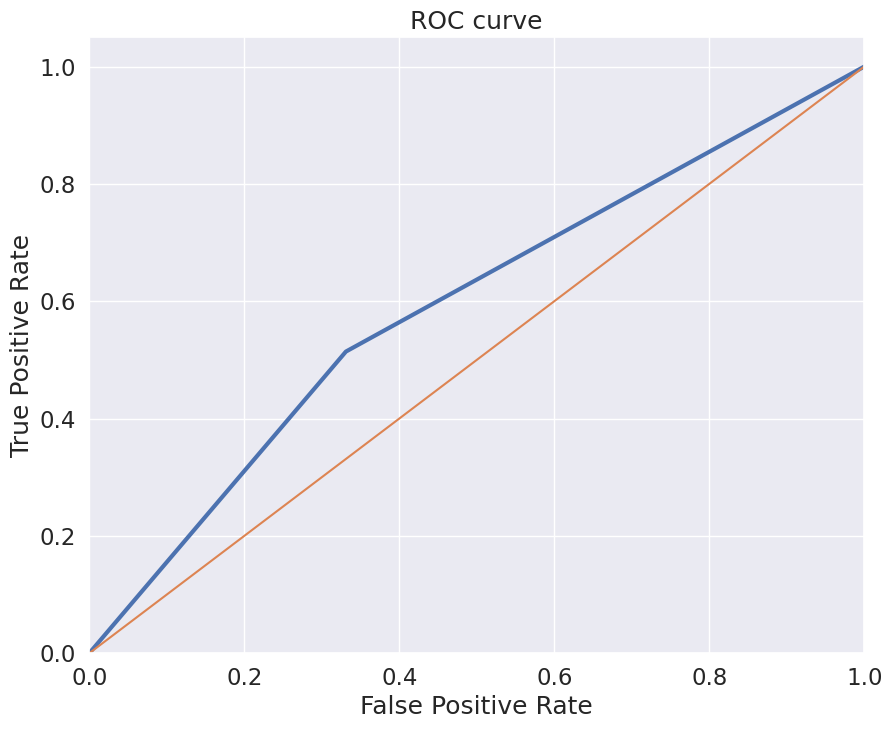

In [379]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test,predict_classes , pos_label=1)
lw = 3
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()